# Titanic - Machine Learning from Disaster

### Serdar Biçici

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [37]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Preparation

### Train Data

#### Identifying Missing Values 

In [38]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Dropping Missing Values

In [39]:
train['Age'].fillna(round(train['Age'].mean()), inplace=True)
train.drop('Cabin', axis=1, inplace=True)
train.drop('Ticket', axis=1, inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [40]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [41]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


### Test Data

In [42]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [43]:
test['Age'].fillna(round(test['Age'].mean()), inplace=True)
test.drop('Cabin', axis=1, inplace=True)
test.drop('Ticket', axis=1, inplace=True)
test["Fare"].fillna(test["Fare"].mean(), inplace=True)

In [44]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# Exploratory Data Analysis

<Axes: title={'center': 'Survival rate in different Sexes'}, xlabel='Sex', ylabel='count'>

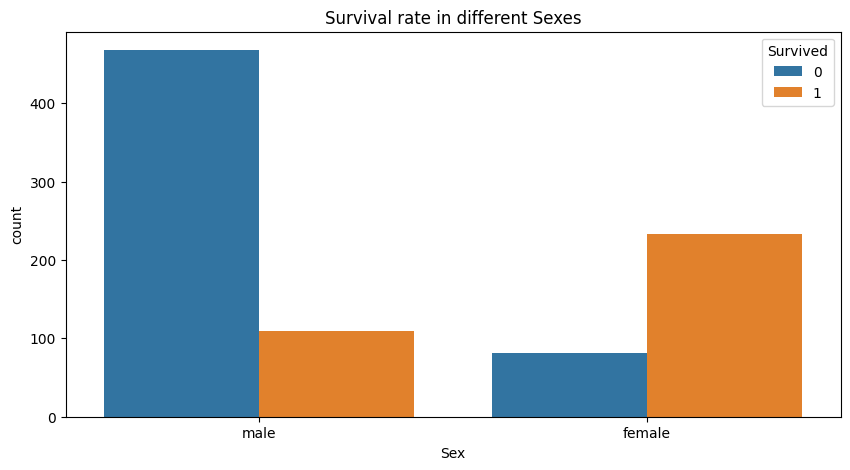

In [45]:
# plot the survival rate in different genders with matplotlib
plt.figure(figsize=(10, 5))
plt.title("Survival rate in different Sexes")
sns.countplot(x="Sex", hue="Survived", data=train)


<Axes: title={'center': 'Survival rate in different classes'}, xlabel='Pclass', ylabel='count'>

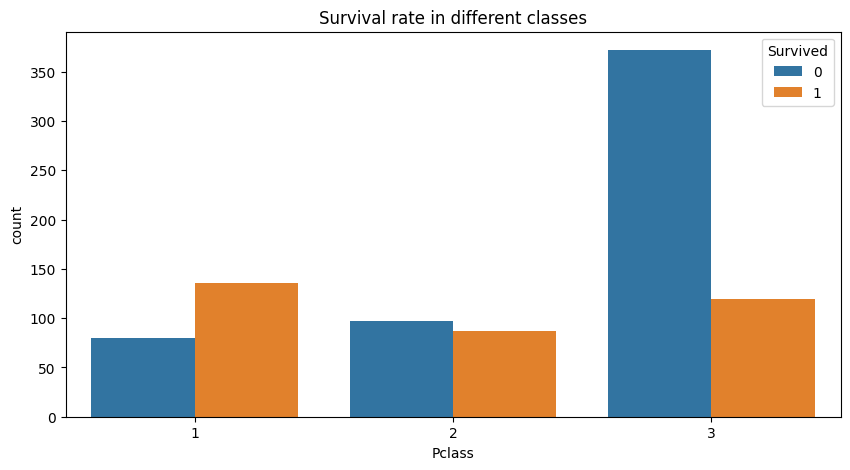

In [46]:
plt.figure(figsize=(10, 5))
plt.title("Survival rate in different classes")
sns.countplot(x='Pclass', hue='Survived', data=train)

C:\Users\Hp\AppData\Local\Temp\ipykernel_5044\2220640573.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'], bins=30)


<Axes: title={'center': 'Age Distribution'}, xlabel='Age', ylabel='Density'>

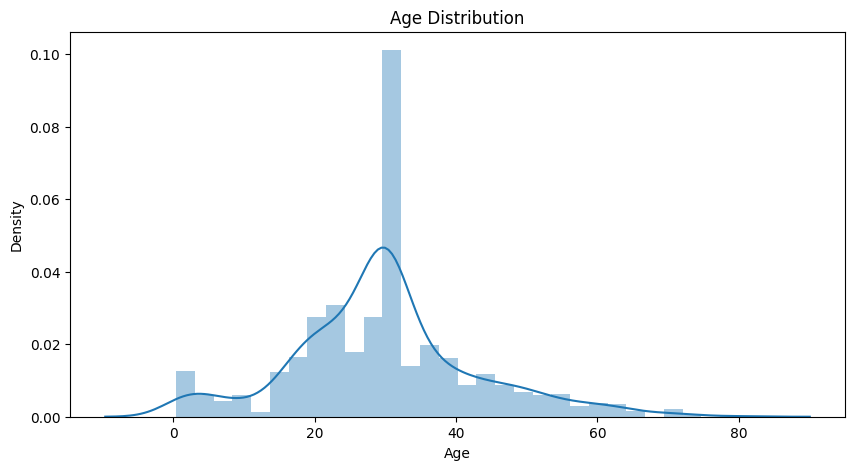

In [47]:
plt.figure(figsize=(10, 5))
plt.title('Age Distribution')
sns.distplot(train['Age'], bins=30)

<Axes: title={'center': 'SibSp Distribution'}, xlabel='SibSp', ylabel='count'>

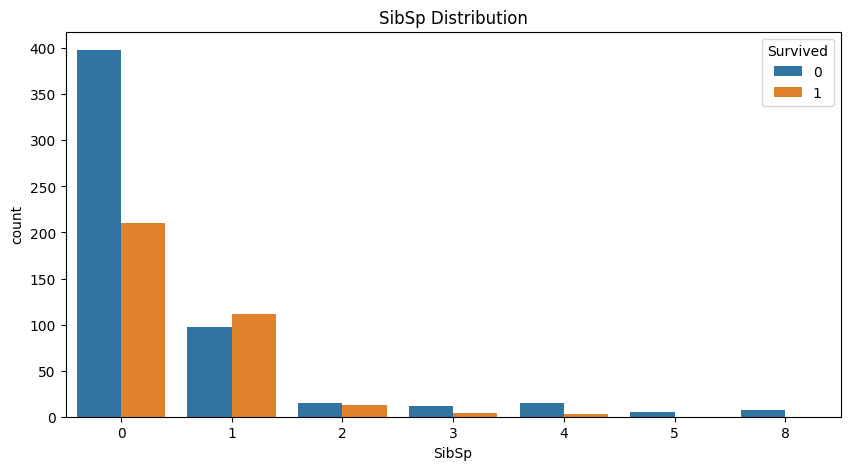

In [48]:
# plot the survival rate in siblings with matplotlib
plt.figure(figsize=(10, 5))
plt.title('SibSp Distribution')
sns.countplot(x='SibSp', hue='Survived', data=train)


# Models

In [49]:
y = train["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked", "Age", "Fare"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

## Random Forest Classifier


In [50]:
model = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
model.fit(X, y)
predictions = model.predict(X_test)

acc_random_forest = model.score(X, y)
print("Accuracy of Random Forest Classifier:", acc_random_forest)

Accuracy of Random Forest Classifier: 0.8507295173961841


## Decision Tree Classifier

In [51]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)
predictions = model.predict(X_test)

acc_decision_tree = model.score(X, y)
print("Accuracy of Decision Tree Classifier:", acc_decision_tree)

Accuracy of Decision Tree Classifier: 0.9797979797979798


## Logistic Regression

In [52]:
model = LogisticRegression(random_state=42)
model.fit(X, y)
predictions = model.predict(X_test)

acc_logistic_regression = model.score(X, y)
print("Accuracy of Logistic Regression Classifier:", acc_logistic_regression)

Accuracy of Logistic Regression Classifier: 0.8013468013468014


C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Support Vector Machine

In [53]:
model = SVC(random_state=42)
model.fit(X, y)
predictions = model.predict(X_test)

acc_svm = model.score(X, y)
print("Accuracy of Support Vector Machine Classifier:", acc_svm)

Accuracy of Support Vector Machine Classifier: 0.6868686868686869


## K-Neighbors Classifier

In [54]:
model = KNeighborsClassifier()
model.fit(X, y)
predictions = model.predict(X_test)

acc_knn = model.score(X, y)
print("Accuracy of K-Nearest Neighbors Classifier:", acc_knn)

Accuracy of K-Nearest Neighbors Classifier: 0.8170594837261503


## Naive Bayes

In [55]:
model = GaussianNB()
model.fit(X, y)
predictions = model.predict(X_test)

acc_naive_bayes = model.score(X, y)
print("Accuracy of Naive Bayes Classifier:", acc_naive_bayes)

Accuracy of Naive Bayes Classifier: 0.7912457912457912


## Neural Network

In [56]:
model = MLPClassifier(random_state=42)
model.fit(X, y)
predictions = model.predict(X_test)

acc_neural_network = model.score(X, y)
print("Accuracy of Neural Network Classifier:", acc_neural_network)

Accuracy of Neural Network Classifier: 0.8361391694725028


C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Gradient Boosting

In [57]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X, y)
predictions = model.predict(X_test)

acc_gradient_boosting = model.score(X, y)
print("Accuracy of Gradient Boosting Classifier:", acc_gradient_boosting)


Accuracy of Gradient Boosting Classifier: 0.8967452300785634


## AdaBoost Classifier

In [58]:
model = AdaBoostClassifier(random_state=42)
model.fit(X, y)
predictions = model.predict(X_test)

acc_adaboost = model.score(X, y)
print("Accuracy of AdaBoost Classifier:", acc_adaboost)

Accuracy of AdaBoost Classifier: 0.8338945005611672


## Bagging Classifier

In [59]:
model = BaggingClassifier(random_state=42)
model.fit(X, y)
predictions = model.predict(X_test)

acc_bagging = model.score(X, y)
print("Accuracy of Bagging Classifier:", acc_bagging)

Accuracy of Bagging Classifier: 0.9629629629629629


## Extra Trees Classifier

In [60]:
model = ExtraTreesClassifier(random_state=42)
model.fit(X, y)
predictions = model.predict(X_test)

acc_extra_trees = model.score(X, y)
print("Accuracy of Extra Trees Classifier:", acc_extra_trees)

Accuracy of Extra Trees Classifier: 0.9797979797979798


# Comparing the Models

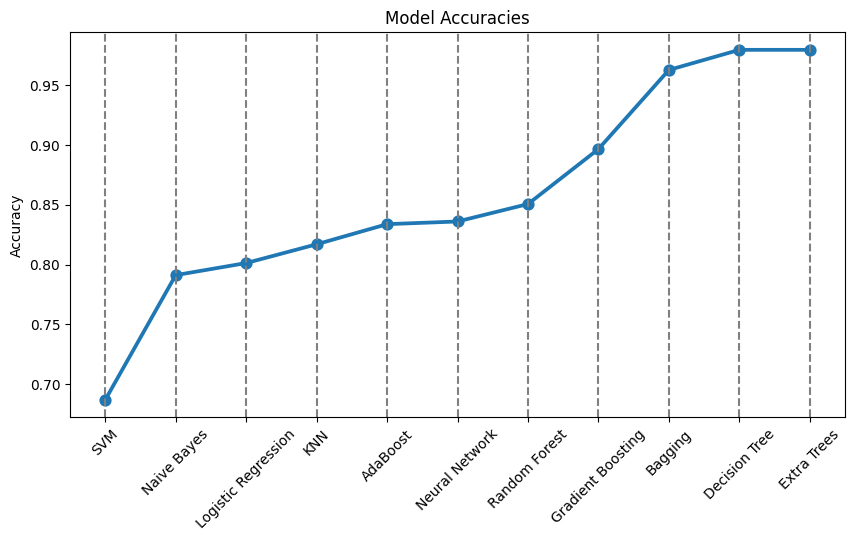

In [61]:
accuracies = {
    "Random Forest": acc_random_forest,
    "Decision Tree": acc_decision_tree,
    "Logistic Regression": acc_logistic_regression,
    "SVM": acc_svm,
    "KNN": acc_knn,
    "Naive Bayes": acc_naive_bayes,
    "Neural Network": acc_neural_network,
    "Gradient Boosting": acc_gradient_boosting,
    "AdaBoost": acc_adaboost,
    "Bagging": acc_bagging,
    "Extra Trees": acc_extra_trees
}

sorted_accuracies = sorted(accuracies.items(), key=lambda x: x[1], reverse=False)

plt.figure(figsize=(10, 5))
plt.title("Model Accuracies")
plt.ylabel("Accuracy")
sns.pointplot(x=[x[0] for x in sorted_accuracies], y=[x[1] for x in sorted_accuracies])

for i in range(len(sorted_accuracies)):
    plt.axvline(x=i, color='gray', linestyle='--')

plt.xticks(rotation=45)
plt.show()

In [62]:
print(f"Best Classifier: {sorted_accuracies[-1][0]} with accuracy {sorted_accuracies[-1][1]}")

#output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
#output.to_csv('my_submission.csv', index=False)



Best Classifier: Extra Trees with accuracy 0.9797979797979798
